In [1]:
import requests
import json
import warnings
import urllib.request
import pandas as pd
import sys # numpy 배열의 전부를 보여준다.
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

from pandas import DataFrame    
from bs4 import BeautifulSoup
from tqdm import tnrange, tqdm_notebook
from konlpy.tag import Okt,Kkma,Hannanum,Komoran,Mecab   
okt = Okt()
kkma = Kkma()
hannanum = Hannanum()
komoran = Komoran
mecab = Mecab


pd.set_option("display.max_rows", None , "display.max_columns", None)
warnings.filterwarnings(action='ignore')

In [2]:
def search(search_word,page_num=1,page_size=40,cross_border_shopping='false',mall='',tag='',catid=''):
    try:
        dic = {
            '쿠팡':'613264',
            '위메프':'197023',
            '티몬':'221844',
            'G9':'280455',
            '이마트':'596',
            '롯데마트':'107396',
            '홈플러스':'108756',
            '롯데프레시':'235018',
            '롯데온':'1243359',
            '인터파크':'3',
            'G마켓':'24',
            '11번가':'17703',
            '옥션':'114',
            '':''
        }
        
        dic2 = {
            '전체':'total',
            '네이버페이':'checkout',
            '쇼핑윈도':'window',
            '백화점/홈쇼핑':'department',
            '':''
        }
        
        dic3 = {
            '쌀':'50004749',
            '현미':'50004751',
            '찹쌀':'50004750',
            '보리':'50004755',
            '콩':'50002156',
            '땅콩':'50002236',
            '흑미':'50004752',
            '혼합곡':'50002158',
            '국내산쇠고기':'50004653',
            '한우':'50004654',
            '수입산쇠고기':'50004655',
            '국내산돼지고기':'50004651',
            '수입산돼지고기':'50004652',
            '닭고기':'50001172',
            '갈치':'50004682',
            '동태':'50004689',
            '황태':'50004747',
            '노가리':'50004744',
            '조기':'50004687',
            '고등어':'50004683',
            '오징어':'50004710',
            '대게/홍게':'50007076',
            '굴':'50004714',
            '사과':'50002160',
            '배':'50002161',
            '복숭아':'50002183',
            '포도':'50002180',
            '밤':'50002237',
            '감':'50002167',
            '귤':'50002163',
            '오렌지':'50002190',
            '참외':'50002177',
            '수박':'50002175',
            '딸기':'50002164',
            '':''
        }
        

        url = 'https://search.shopping.naver.com/search/all?' +\
                'catId=' + dic3[catid] +\
                '&exagency=' + cross_border_shopping +\
                '&frm=NVSHATC&origQuery='+ search_word +\
                '&pagingIndex='+ str(page_num) +\
                '&pagingSize='+ str(page_size) +\
                '&productSet='+ dic2[tag] +\
                '&total&query='+ search_word +\
                '&sort=rel&timestamp=&viewType=list'+\
                '&mall=' + dic[mall]
        return(url)
    
    except:
        print('잘못입력하였습니다.')

In [3]:
def soup2(url):
    headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
    }
    
    response = requests.get(url,headers=headers,verify=False)
    soup     = BeautifulSoup(response.text,'lxml')
    soup2    = soup.select('body > script')[0].text.replace('window.__PRELOADED_STATE__=','')
    return(soup2)

In [4]:
 def data(soup2):
    soup2_j  = json.loads(soup2)
    soup2_li = soup2_j['props']['pageProps']['initialState']['products']['list']
    return(soup2_li)

In [5]:
a = ['사과 -즙','배 -즙','복숭아 -즙','포도 -즙','밤 -맛밤','감','귤','오렌지 -즙','참외','수박 -주스 -즙','딸기 -주스']
aa = ['사과','배','복숭아','포도','밤','감','귤','오렌지','참외','수박','딸기']
b = ['홈플러스','이마트','롯데온','인터파크','G9','쿠팡','G마켓','11번가','옥션','롯데마트','롯데프레시','']
c = ['전체','네이버페이','쇼핑윈도','백화점/홈쇼핑']

In [ ]:
df = DataFrame({'title':title,
               'label':label})
df2 = df.drop_duplicates(['title']) #중복제거

In [6]:
df2 = pd.read_excel('C:/Users/user/Desktop/[2] 73품목 (영진).xlsx',sheet_name='TOTAL')

In [20]:
A = list(df2['상품명'])
hannanum_n = []
for i in tnrange(len(A)):
    hannanum_n.append(hannanum.nouns(A[i]))
    
hannanum_n_list = [' '.join(doc) for doc in hannanum_n]

In [47]:
A = list(df2['title'])
kkma_n = []
for i in tnrange(len(A)):
    kkma_n.append(kkma.nouns(A[i]))
    
kkma_n_list = [' '.join(doc) for doc in kkma_n]

In [48]:
A = list(df2['title'])
komoran_n = []
for i in tnrange(len(A)):
    komoran_n.append(komoran.nouns(A[i]))
    
komoran_n_list = [' '.join(doc) for doc in komoran_n]

In [8]:
A = list(df2['상품명'])
okt_n = []
for i in tnrange(len(A)):
    okt_n.append(okt.nouns(A[i]))

okt_n_list = [' '.join(doc) for doc in okt_n]

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer() # TF-IDF 객체선언

tfidf_vectorizer.fit(okt_n_list) # 벡터라이저가 단어들을 학습합니다.
tfidf_vectorizer.vocabulary_          # 벡터라이저가 학습한 단어사전을 출력합니다.
sorted(tfidf_vectorizer.vocabulary_.items()) # 단어사전을 정렬합니다.

[('가가', 0),
 ('가가호호', 1),
 ('가거도', 2),
 ('가게', 3),
 ('가격', 4),
 ('가격특', 5),
 ('가격파괴', 6),
 ('가고메', 7),
 ('가공', 8),
 ('가공품', 9),
 ('가교', 10),
 ('가구', 11),
 ('가나', 12),
 ('가나안', 13),
 ('가농', 14),
 ('가능', 15),
 ('가니쉬', 16),
 ('가다랑어', 17),
 ('가다랑어포', 18),
 ('가닥', 19),
 ('가당', 20),
 ('가덕도', 21),
 ('가드', 22),
 ('가득', 23),
 ('가든', 24),
 ('가디건', 25),
 ('가라', 26),
 ('가라아게', 27),
 ('가락', 28),
 ('가락시장', 29),
 ('가람', 30),
 ('가량', 31),
 ('가령', 32),
 ('가로', 33),
 ('가로수길', 34),
 ('가루', 35),
 ('가루지기', 36),
 ('가름', 37),
 ('가리비', 38),
 ('가리포', 39),
 ('가림', 40),
 ('가마', 41),
 ('가마니', 42),
 ('가마솥', 43),
 ('가무', 44),
 ('가문', 45),
 ('가물치', 46),
 ('가미', 47),
 ('가바', 48),
 ('가방', 49),
 ('가부', 50),
 ('가성', 51),
 ('가세', 52),
 ('가소', 53),
 ('가수', 54),
 ('가스', 55),
 ('가스레인지', 56),
 ('가스렌지', 57),
 ('가슴', 58),
 ('가슴속', 59),
 ('가습기', 60),
 ('가시', 61),
 ('가시오가피', 62),
 ('가쓰오부시', 63),
 ('가야', 64),
 ('가야농장', 65),
 ('가야산', 66),
 ('가열', 67),
 ('가염', 68),
 ('가오', 69),
 ('가오리', 70),
 ('가온', 71),
 ('가요', 72),
 ('가용', 73),
 

In [10]:
tfidf_vectorizer.idf_.shape

(11521,)

In [11]:
tfidf_vectorizer.idf_ # IDF 벡터화 (문서수)

array([ 9.67135816, 11.05765252,  7.83877669,  9.85367971,  8.44269274,
       11.46311763, 10.07682326, 11.46311763,  5.89668334, 10.54682689,
       11.46311763, 11.05765252, 11.05765252, 10.76997045,  8.93738898,
        8.06192024, 11.05765252,  9.38367608,  9.67135816, 11.46311763,
        7.63447623, 11.46311763, 10.07682326,  7.22179087,  8.8240603 ,
       10.76997045, 11.46311763,  9.51720748,  5.5361916 ,  6.33321891,
        9.59131545, 11.05765252, 11.46311763, 10.76997045, 11.46311763,
        6.03816761, 11.46311763, 11.46311763,  6.15237774, 10.76997045,
        9.26589305,  9.32305146, 11.46311763,  9.51720748, 11.46311763,
        8.57274587, 11.46311763, 10.36450534,  8.89816827,  8.97821098,
       11.46311763, 10.07682326, 11.05765252, 11.46311763, 11.46311763,
        9.75836953,  9.85367971, 11.46311763,  5.52954706, 11.46311763,
       10.76997045,  9.26589305, 11.46311763,  8.07872736, 10.76997045,
       11.05765252, 11.46311763, 10.54682689,  9.75836953, 11.46

In [12]:
tfidf_vectorizer.transform(okt_n_list).toarray()

KeyboardInterrupt: 

In [24]:
okt_n_list[0]

'푸드 햅쌀 황금 미가'

In [ ]:
#https://wikidocs.net/22933
#https://wikidocs.net/31766
#https://class101.dev/ko/blog/2019/07/16/esmond/

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
corpus = list(df2['상품명'].head(10))
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0
  1 1 1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 1 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0

In [113]:
corpus = pd.Series(okt_n_list)
TfidfVectorizer().transform(corpus).toarray()

NotFittedError: TfidfVectorizer - Vocabulary wasn't fitted.

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = pd.Series(okt_n_list)
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

MemoryError: 

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
sentences = ['This is the first document.',
              'This is the second document.',
              'And the third one.',
              'Is this the first document?']
vect = TfidfVectorizer()
X = vect.fit_transform(sentences)
X.todense()


matrix([[0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
         0.        , 0.35872874, 0.        , 0.43877674],
        [0.        , 0.40412895, 0.        , 0.40412895, 0.        ,
         0.63314609, 0.33040189, 0.        , 0.40412895],
        [0.55280532, 0.        , 0.        , 0.        , 0.55280532,
         0.        , 0.28847675, 0.55280532, 0.        ],
        [0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
         0.        , 0.35872874, 0.        , 0.43877674]])

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer


doc_list = [
    '프리시즌 아시아 투어를 떠나는 토트넘은 싱가포르, 중국을 차례로 방문해 ICC 경기를 치른다.',
    '영국 "풋볼 런던"은 11일 "토트넘이 ICC 첫 경기에서 가장 강력한 스쿼드로 유벤투스에 맞설 것"이라고 평가했다.',
    '토트넘에 합류하는 손흥민은 유벤투스전 출전을 목표로 구슬땀을 흘릴 예정이다.',
]

tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc_list)
doc_similarities = (tfidf_matrix * tfidf_matrix.T)

print(doc_similarities.toarray())

[[1.         0.04612956 0.        ]
 [0.04612956 1.         0.        ]
 [0.         0.         1.        ]]


In [103]:
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(okt_n_list[0:10])
doc_nouns_similarities = (tfidf_matrix * tfidf_matrix.T)
print(okt_n_list[0:10])
print(doc_nouns_similarities.toarray())

['푸드 햅쌀 황금 미가', '하루 홍천 철원 햇빛 쌀', '중소기업 쿠폰 현대 카드 쿠폰 최종 명 가미 곡 지리산 메뚜기 쌀 백미 상세 페이지 쿠폰 다운 클릭', '햅쌀 굿 평안 쌀', '햅쌀 경기도 대왕 표 여주 쌀', '햅쌀 나 쌀', '햅쌀 농협 임금님 표 이천 쌀', '햅쌀 기미 햇살 고시히카리', '기미 행복', '솔바람 표 기미 추청 아끼바레']
[[1.         0.         0.         0.14002435 0.08764245 0.29604467
  0.08764245 0.09428284 0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.14002435 0.         0.         1.         0.14002435 0.47298384
  0.14002435 0.15063355 0.         0.        ]
 [0.08764245 0.         0.         0.14002435 1.         0.29604467
  0.08764245 0.09428284 0.         0.        ]
 [0.29604467 0.         0.         0.47298384 0.29604467 1.
  0.29604467 0.31847505 0.         0.        ]
 [0.08764245 0.         0.         0.14002435 0.08764245 0.29604467
  1.         0.09428284 0.         0.        ]
 [0.09428284 0.  

In [224]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#https://kst1.tistory.com/44
# 오류일때

In [225]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [226]:
print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [227]:
print(X_train[0]) # 첫번째 훈련용 뉴스 기사
print(y_train[0]) # 첫번째 훈련용 뉴스 기사의 레이블

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.5398574927633


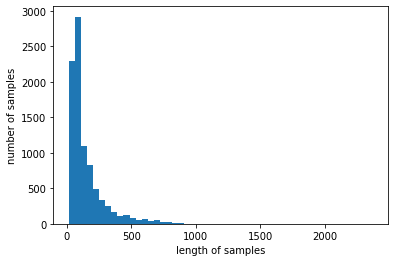

In [228]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(l) for l in X_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

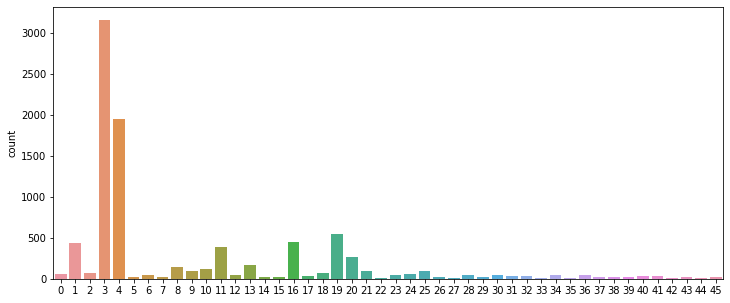

In [229]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [230]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))
# label_cnt=dict(zip(unique_elements, counts_elements))
# 아래의 출력 결과가 보기 불편하여 병렬로 보고싶다면 위의 label_cnt를 출력

각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [231]:
word_to_index = reuters.get_word_index()
print(word_to_index)

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16266, 'slickline': 20692, 'doldrums': 13799, 'kids': 12092, 'cl

In [232]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key
print('빈도수 상위 28842번 단어 : {}'.format(index_to_word[28842]))

빈도수 상위 28842번 단어 : nondiscriminatory


In [235]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


In [236]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [249]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [250]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len) # 훈련용 뉴스 기사 패딩
X_test = pad_sequences(X_test, maxlen=max_len) # 테스트용 뉴스 기사 패딩

In [251]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [252]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

In [253]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [254]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [255]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 3.8214 - acc: 0.195 - ETA: 6s - loss: 3.8139 - acc: 0.293 - ETA: 8s - loss: 3.8086 - acc: 0.294 - ETA: 9s - loss: 3.8008 - acc: 0.296 - ETA: 10s - loss: 3.7891 - acc: 0.31 - ETA: 10s - loss: 3.7747 - acc: 0.32 - ETA: 10s - loss: 3.7600 - acc: 0.32 - ETA: 10s - loss: 3.7362 - acc: 0.33 - ETA: 10s - loss: 3.7052 - acc: 0.34 - ETA: 10s - loss: 3.6615 - acc: 0.34 - ETA: 10s - loss: 3.5882 - acc: 0.34 - ETA: 10s - loss: 3.5157 - acc: 0.34 - ETA: 10s - loss: 3.4390 - acc: 0.35 - ETA: 10s - loss: 3.4000 - acc: 0.34 - ETA: 10s - loss: 3.3381 - acc: 0.35 - ETA: 10s - loss: 3.2865 - acc: 0.35 - ETA: 10s - loss: 3.2582 - acc: 0.35 - ETA: 9s - loss: 3.2028 - acc: 0.3503 - ETA: 9s - loss: 3.1648 - acc: 0.349 - ETA: 9s - loss: 3.1375 - acc: 0.339 - ETA: 9s - loss: 3.1031 - acc: 0.332 - ETA: 9s - loss: 3.0804 - acc: 0.327 - ETA: 9s - loss: 3.0540 - acc: 0.319 - ETA: 9s - loss: 3.0349 - acc: 0.314 - ETA: 8s - loss: 3.0128 - acc: 0.310

70/71 [============================>.] - ETA: 0s - loss: 1.7168 - acc: 0.570 - ETA: 5s - loss: 1.8449 - acc: 0.535 - ETA: 7s - loss: 1.8592 - acc: 0.518 - ETA: 8s - loss: 1.8634 - acc: 0.517 - ETA: 8s - loss: 1.8955 - acc: 0.521 - ETA: 9s - loss: 1.8864 - acc: 0.515 - ETA: 9s - loss: 1.8629 - acc: 0.530 - ETA: 9s - loss: 1.8434 - acc: 0.536 - ETA: 8s - loss: 1.8190 - acc: 0.539 - ETA: 9s - loss: 1.7917 - acc: 0.545 - ETA: 9s - loss: 1.8000 - acc: 0.544 - ETA: 9s - loss: 1.7771 - acc: 0.549 - ETA: 8s - loss: 1.7452 - acc: 0.556 - ETA: 8s - loss: 1.7423 - acc: 0.556 - ETA: 8s - loss: 1.7345 - acc: 0.560 - ETA: 8s - loss: 1.7305 - acc: 0.563 - ETA: 8s - loss: 1.7439 - acc: 0.557 - ETA: 8s - loss: 1.7443 - acc: 0.557 - ETA: 8s - loss: 1.7469 - acc: 0.558 - ETA: 8s - loss: 1.7435 - acc: 0.559 - ETA: 8s - loss: 1.7476 - acc: 0.558 - ETA: 7s - loss: 1.7486 - acc: 0.557 - ETA: 7s - loss: 1.7434 - acc: 0.557 - ETA: 7s - loss: 1.7409 - acc: 0.556 - ETA: 7s - loss: 1.7490 - acc: 0.553 - ETA: 7s -

70/71 [============================>.] - ETA: 0s - loss: 1.3561 - acc: 0.593 - ETA: 5s - loss: 1.3634 - acc: 0.621 - ETA: 6s - loss: 1.3675 - acc: 0.622 - ETA: 8s - loss: 1.3475 - acc: 0.632 - ETA: 8s - loss: 1.3515 - acc: 0.634 - ETA: 8s - loss: 1.3285 - acc: 0.638 - ETA: 8s - loss: 1.3451 - acc: 0.626 - ETA: 8s - loss: 1.3112 - acc: 0.637 - ETA: 8s - loss: 1.2945 - acc: 0.644 - ETA: 8s - loss: 1.3080 - acc: 0.644 - ETA: 8s - loss: 1.2860 - acc: 0.654 - ETA: 8s - loss: 1.2862 - acc: 0.656 - ETA: 8s - loss: 1.2788 - acc: 0.659 - ETA: 8s - loss: 1.2746 - acc: 0.661 - ETA: 8s - loss: 1.2734 - acc: 0.662 - ETA: 8s - loss: 1.2641 - acc: 0.664 - ETA: 8s - loss: 1.2600 - acc: 0.664 - ETA: 8s - loss: 1.2564 - acc: 0.664 - ETA: 7s - loss: 1.2696 - acc: 0.661 - ETA: 7s - loss: 1.2626 - acc: 0.664 - ETA: 7s - loss: 1.2547 - acc: 0.667 - ETA: 7s - loss: 1.2628 - acc: 0.665 - ETA: 7s - loss: 1.2731 - acc: 0.664 - ETA: 7s - loss: 1.2712 - acc: 0.664 - ETA: 7s - loss: 1.2731 - acc: 0.662 - ETA: 7s -

70/71 [============================>.] - ETA: 0s - loss: 0.9470 - acc: 0.773 - ETA: 7s - loss: 0.8446 - acc: 0.793 - ETA: 9s - loss: 0.9057 - acc: 0.781 - ETA: 10s - loss: 0.9758 - acc: 0.75 - ETA: 11s - loss: 0.9856 - acc: 0.74 - ETA: 11s - loss: 1.0379 - acc: 0.73 - ETA: 11s - loss: 1.0221 - acc: 0.74 - ETA: 11s - loss: 1.0009 - acc: 0.74 - ETA: 11s - loss: 1.0119 - acc: 0.74 - ETA: 11s - loss: 1.0022 - acc: 0.74 - ETA: 11s - loss: 0.9974 - acc: 0.74 - ETA: 11s - loss: 1.0016 - acc: 0.74 - ETA: 11s - loss: 1.0197 - acc: 0.74 - ETA: 12s - loss: 1.0253 - acc: 0.74 - ETA: 11s - loss: 1.0346 - acc: 0.73 - ETA: 11s - loss: 1.0300 - acc: 0.73 - ETA: 11s - loss: 1.0279 - acc: 0.73 - ETA: 11s - loss: 1.0192 - acc: 0.74 - ETA: 11s - loss: 1.0108 - acc: 0.74 - ETA: 10s - loss: 1.0152 - acc: 0.74 - ETA: 10s - loss: 1.0208 - acc: 0.74 - ETA: 10s - loss: 1.0296 - acc: 0.73 - ETA: 10s - loss: 1.0303 - acc: 0.73 - ETA: 9s - loss: 1.0307 - acc: 0.7399 - ETA: 9s - loss: 1.0334 - acc: 0.738 - ETA: 9s 

70/71 [============================>.] - ETA: 0s - loss: 0.8607 - acc: 0.781 - ETA: 6s - loss: 0.9095 - acc: 0.781 - ETA: 7s - loss: 0.8373 - acc: 0.789 - ETA: 8s - loss: 0.9465 - acc: 0.757 - ETA: 8s - loss: 0.9696 - acc: 0.754 - ETA: 8s - loss: 0.9743 - acc: 0.744 - ETA: 9s - loss: 0.9594 - acc: 0.748 - ETA: 8s - loss: 0.9759 - acc: 0.742 - ETA: 8s - loss: 0.9719 - acc: 0.741 - ETA: 8s - loss: 0.9737 - acc: 0.743 - ETA: 8s - loss: 0.9675 - acc: 0.744 - ETA: 8s - loss: 0.9580 - acc: 0.744 - ETA: 8s - loss: 0.9614 - acc: 0.743 - ETA: 8s - loss: 0.9567 - acc: 0.746 - ETA: 8s - loss: 0.9499 - acc: 0.747 - ETA: 8s - loss: 0.9338 - acc: 0.751 - ETA: 8s - loss: 0.9403 - acc: 0.750 - ETA: 7s - loss: 0.9313 - acc: 0.753 - ETA: 7s - loss: 0.9228 - acc: 0.757 - ETA: 7s - loss: 0.9149 - acc: 0.760 - ETA: 7s - loss: 0.9137 - acc: 0.762 - ETA: 7s - loss: 0.9075 - acc: 0.763 - ETA: 7s - loss: 0.8985 - acc: 0.766 - ETA: 7s - loss: 0.8961 - acc: 0.765 - ETA: 7s - loss: 0.8989 - acc: 0.764 - ETA: 6s -

71/71 [==============================] - ETA: 0s - loss: 0.7815 - acc: 0.796 - ETA: 5s - loss: 0.7127 - acc: 0.812 - ETA: 6s - loss: 0.7485 - acc: 0.789 - ETA: 7s - loss: 0.7422 - acc: 0.798 - ETA: 8s - loss: 0.7175 - acc: 0.804 - ETA: 8s - loss: 0.7634 - acc: 0.790 - ETA: 8s - loss: 0.7719 - acc: 0.792 - ETA: 8s - loss: 0.7615 - acc: 0.797 - ETA: 8s - loss: 0.7554 - acc: 0.796 - ETA: 8s - loss: 0.7400 - acc: 0.803 - ETA: 8s - loss: 0.7308 - acc: 0.804 - ETA: 8s - loss: 0.7289 - acc: 0.806 - ETA: 8s - loss: 0.7369 - acc: 0.806 - ETA: 8s - loss: 0.7384 - acc: 0.806 - ETA: 8s - loss: 0.7336 - acc: 0.806 - ETA: 7s - loss: 0.7473 - acc: 0.806 - ETA: 7s - loss: 0.7455 - acc: 0.805 - ETA: 7s - loss: 0.7430 - acc: 0.806 - ETA: 7s - loss: 0.7425 - acc: 0.808 - ETA: 7s - loss: 0.7447 - acc: 0.807 - ETA: 7s - loss: 0.7517 - acc: 0.805 - ETA: 7s - loss: 0.7605 - acc: 0.804 - ETA: 7s - loss: 0.7513 - acc: 0.807 - ETA: 7s - loss: 0.7556 - acc: 0.807 - ETA: 6s - loss: 0.7534 - acc: 0.806 - ETA: 6s -

In [256]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - ETA: 0s - loss: 0.9201 - acc: 0.781 - ETA: 0s - loss: 1.1303 - acc: 0.734 - ETA: 1s - loss: 1.1806 - acc: 0.750 - ETA: 1s - loss: 1.1015 - acc: 0.759 - ETA: 1s - loss: 1.1141 - acc: 0.738 - ETA: 0s - loss: 1.1182 - acc: 0.732 - ETA: 0s - loss: 1.1480 - acc: 0.727 - ETA: 0s - loss: 1.1386 - acc: 0.728 - ETA: 0s - loss: 1.1150 - acc: 0.731 - ETA: 0s - loss: 1.1661 - acc: 0.719 - ETA: 0s - loss: 1.1936 - acc: 0.710 - ETA: 0s - loss: 1.1909 - acc: 0.712 - ETA: 0s - loss: 1.1917 - acc: 0.714 - ETA: 0s - loss: 1.1867 - acc: 0.717 - ETA: 0s - loss: 1.1907 - acc: 0.715 - ETA: 0s - loss: 1.2046 - acc: 0.714 - ETA: 0s - loss: 1.1963 - acc: 0.714 - ETA: 0s - loss: 1.1890 - acc: 0.714 - ETA: 0s - loss: 1.1738 - acc: 0.714 - ETA: 0s - loss: 1.1976 - acc: 0.711 - ETA: 0s - loss: 1.2011 - acc: 0.711 - ETA: 0s - loss: 1.1990 - acc: 0.711 - ETA: 0s - loss: 1.2014 - acc: 0.710 - ETA: 0s - loss: 1.2180 - acc: 0.707 - 1s 19ms/step - loss: 1.2190 - acc: 0.7075

 테스트

title의 최대 길이 :94
title의 평균 길이 :21.071422265383596


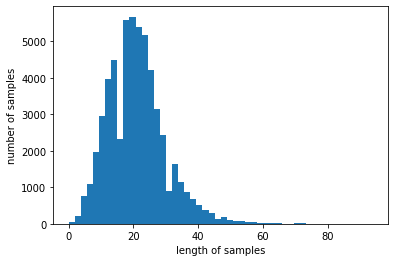

In [154]:
print('title의 최대 길이 :{}'.format(max(len(l) for l in corpus)))
print('title의 평균 길이 :{}'.format(sum(map(len, corpus))/len(corpus)))

plt.hist([len(s) for s in corpus], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

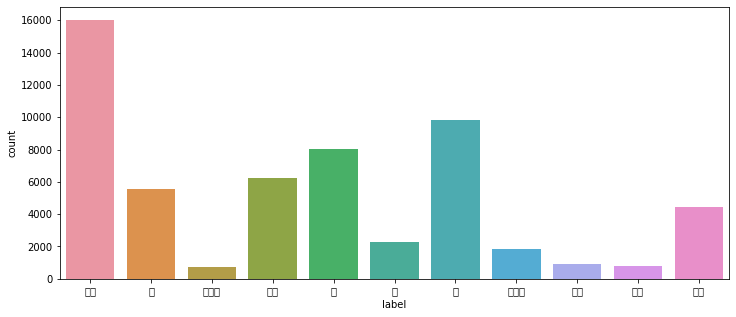

In [156]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(df2['label'])

In [207]:
unique_elements, counts_elements = np.unique(tokenizer.texts_to_sequences(df2['label']), return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))
# label_cnt=dict(zip(unique_elements, counts_elements))
# 아래의 출력 결과가 보기 불편하여 병렬로 보고싶다면 위의 label_cnt를 출력

각 레이블에 대한 빈도수:
[[    1     2     3     4     5     6     7     8     9    10    11]
 [16017  9817  8037  6264  5578  4417  2264  1826   937   776   702]]


In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(okt_n_list)
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'여름': 2929, '대표': 914, '산지': 2095, '사과': 2014, '미니': 1511, '황금': 5078, '대추': 911, '산들': 2070, '껍질': 567, '경북': 190, '세척': 2341, '과내': 290, '푸른': 4714, '정성': 3719, '명품': 1413, '선물': 2275, '세트': 2343, '내외': 670, '꿀맛': 596, '테이블': 4476, '농협': 746, '중과': 3866, '중소': 3882, '일리': 3497, '오존': 3054, '개별': 113, '봉지': 1859, '포장': 4680, '명절': 1410, '국내': 365, '가정': 40, '박스': 1603, '석류': 2266, '우즈벡': 3203, '익산': 3455, '직송': 3944, '순차': 2470, '배송': 1688, '스프링': 2547, '타임': 4434, '자연': 3565, '느낌': 759, '그대로': 418, '실속': 2652, '프리미엄': 4768, '정품': 3740, '바로': 1577, '도사': 977, '금주특': 459, '맛남': 1325, '새벽': 2179, '가능': 7, '상품': 2170, '보조개': 1820, '황옥': 5091, '문경': 1476, '감홍': 81, '특품': 4560, '유명산': 3293, '싱싱': 2669, '플러스': 4774, '초록': 4136, '대구': 874, '능금': 764, '부사': 1882, '발송': 1633, '안동': 2756, '남상': 647, '명실': 1405, '상주': 2157, '이내': 3378, '다농':

In [221]:
index_to_word = {}
for key, value in tfidfv.vocabulary_.items():
    index_to_word[value] = key
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))

빈도수 상위 1번 단어 : 가격


In [191]:
aa = {'사과':1,'배':2,'복숭아':3,'포도':4,'밤':5,'감':6,'귤':7,'오렌지':8,'참외':9,'수박':10,'딸기':11}
df2['label'].values

array(['사과', '사과', '사과', ..., '딸기', '딸기', '딸기'], dtype=object)

In [192]:
aa['OOV'] = len(aa) + 1

In [193]:
aa

{'사과': 1,
 '배': 2,
 '복숭아': 3,
 '포도': 4,
 '밤': 5,
 '감': 6,
 '귤': 7,
 '오렌지': 8,
 '참외': 9,
 '수박': 10,
 '딸기': 11,
 'OOV': 12}

In [197]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [206]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df2['label'])
print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(df2['label']))


{'사과': 1, '귤': 2, '밤': 3, '포도': 4, '배': 5, '딸기': 6, '감': 7, '오렌지': 8, '참외': 9, '수박': 10, '복숭아': 11}
OrderedDict([('사과', 16017), ('배', 5578), ('복숭아', 702), ('포도', 6264), ('밤', 8037), ('감', 2264), ('귤', 9817), ('오렌지', 1826), ('참외', 937), ('수박', 776), ('딸기', 4417)])
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], 